In [ ]:
from skimage.color import rgb2gray
from skimage import exposure
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Color balencing algorithm

In [ ]:
# function that applies filter
def apply_gray_world_alg(images):
    balanced_images = []
    for image in images:
        gray_image = rgb2gray(image) # Convert to grayscale for computing average
        balanced_image = exposure.equalize_hist(image, mask=gray_image)
        balanced_images.append(balanced_image)
    return np.array(balanced_images)

In [ ]:
train_data = np.load('CIFAKE_Train.npz')
test_data = np.load('CIFAKE_Test.npz')

X_train = train_data['images']
y_train = train_data['labels']

X_test = test_data['images']
y_test = test_data['labels']

label_names = train_data['label_names']

In [ ]:
X_balenced_train = apply_gray_world_alg(X_train)
X_balenced_test = apply_gray_world_alg(X_test)

In [ ]:
# plot images function
def PlotImages(ix_start,num_img,rows,cols,images,labels,label_names,color=True):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for i in range(num_img):
        plt.subplot(rows,cols,i+1)
        plt.axis('off')
        if color:
            plt.imshow(images[ix_start+i])
        else:
            plt.imshow(np.squeeze(images[ix_start+i]),cmap='Greys')
        plt.title(label_names[labels[ix_start+i]])

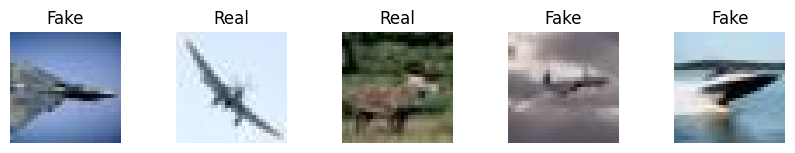

In [ ]:
# images before Gaussian blur
PlotImages(0,5,1,5,X_train,y_train,label_names)

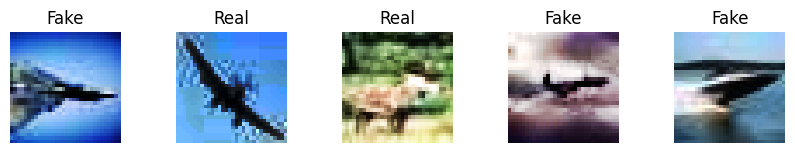

In [ ]:
# images after Gaussian blur
PlotImages(0,5,1,5,X_balenced_train,y_train,label_names)

In [ ]:
# save as .npz file
np.savez_compressed('Color_Balenced_Train.npz', images=np.stack(X_balenced_train, axis=0), labels=y_train, label_names=label_names)
np.savez_compressed('Color_Balenced_Test.npz', images=np.stack(X_balenced_test, axis=0), labels=y_test, label_names=label_names)